<a href="https://colab.research.google.com/github/jenyadev3/Telecom-customer-base-segmentation/blob/main/vkr_telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Сегментация клиентской базы телекоммуникационной компании

**Аналитическая задача** — провести анализ данных с целью выделения наиболее типичных групп клиентов и разработки предложений для каждой из групп.

## Описание данных
Каждый клиент описывается следующим набором признаков:
- `Возраст`, `Среднемесячный расход`, `Средняя продолжительность разговоров`, `Звонков днем за месяц`, `Звонков вечером за месяц`, `Звонков ночью за месяц`, `Звонки в другие города`, `Звонки в другие страны`, `Доля звонков на стационарные телефоны`, `Количество SMS за месяц`, `Дата подключения тарифа`.

## Примерный план по выполнению проекта

**Шаг 1.** Загрузка данных;

**Шаг 2.** Первичная обработка данных (при необходимости):
- скорректировать заголовки;
- скорректировать типы признаков;
- проверить наличие дублирующихся записей;
- проверить наличие аномальных значений;
- восстановить пропущенные значения;

**Шаг 3.** Добавление новых переменных:
- по значениям признака `Возраст` введите новую переменную `Возрастная категория`, принимающую значения "студент", "аспирант", "бизнесмен" и "знаток" по следующую правилу:

$$
\text{Возрастная категория} =
\left\{
\begin{array}{l}
\text{студент,} \quad \text{если Возраст } \in [19, 24];\\  
\text{аспирант,} \quad \text{если Возраст } \in [25, 33];\\
\text{бизнесмен,} \quad \text{если Возраст } \in [34, 56];\\
\text{знаток,} \quad \text{если Возраст } \in [57, 70].
\end{array}
\right.
$$

- по значениям признака `Дата подключения тарифа` создайте признаки: `Год подключения`, `Месяц подключения`, `Дата подключения`;  

**Шаг 3.** Провести исследовательский анализ данных:
- в разрезе значений признаков `Год подключения`, `Месяц подключения`, `Дата подключения` исследуйте:
    - динамику подключения к тарифам (количество клиентов). Постройте графики. В какой год, месяц и день подключались меньше/больше всего клиентов? Какие выводы можно сделать?
- в разрезе значений признака `Возрастная категория` исследуйте распределение признаков `Среднемесячный расход`, `Средняя продолжительность разговоров`, `Звонков днем за месяц`, `Звонков вечером за месяц`, `Звонков ночью за месяц`, `Звонки в другие города`, `Доля звонков на стационарные телефоны`, `Количество SMS за месяц`. Для каждого из признаков рассчитайте выборочное среднее, медиану и моду. Постройте графики. Какие выводы можно сделать о предпочтениях клиентов разных возрастных категорий в отношении используемых услуг (звонков и SMS; времени суток);
- клиенты каких возрастных категорий (ТОП-2):
  
    - больше всего в среднем в месяц тратят на оплату услуг связи;
    - больше всего тратят времени на общение в месяц днем, вечером и ночью;
    - больше всего по количеству звонков в месяц днем, вечером и ночью. Совпадают ли результаты с предыдущем пунктом;

- с помощью диаграмм рассеивания исследуейте зависимости между признаками `Среднемесячный расход`, `Средняя продолжительность разговоров`, `Звонков днем за месяц`, `Звонков вечером за месяц`, `Звонков ночью за месяц`, `Звонки в другие города`, `Доля звонков на стационарные телефоны`, `Количество SMS за месяц`. Какие выводы можно сделать?

**1. Загрузка данных**

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/dataset_telecom.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Возраст                                4492 non-null   int64  
 1   Среднемесячный расход                  4468 non-null   float64
 2   Средняя продолжительность разговоров   4475 non-null   float64
 3   Звонков днем за месяц                  4472 non-null   float64
 4   Звонков вечером за месяц               4489 non-null   float64
 5   Звонков ночью за месяц                 4492 non-null   object 
 6   Звонки в другие города                 4492 non-null   object 
 7   Звонки в другие страны                 4492 non-null   int64  
 8   Доля звонков на стационарные телефоны  4492 non-null   object 
 9   Количество SMS за месяц                4492 non-null   object 
 10  Дата подключения тарифа                4492 non-null   object 
dtypes: f

In [ ]:
df.describe()

,Возраст,Среднемесячный расход,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц,Звонки в другие страны
count,4492.000000,4468.000000,4475.000000,4472.000000,4489.000000,4492.000000
mean,41.894924,505.533577,4.230827,63.899374,70.363778,0.394034
std,13.077254,646.354693,3.005210,62.877394,41.219909,1.171980
min,19.000000,3.180000,0.100000,1.000000,1.000000,0.000000
25%,31.000000,152.490000,2.100000,37.000000,42.000000,0.000000
50%,43.000000,315.510000,3.300000,53.000000,71.000000,0.000000
75%,52.000000,599.840000,5.900000,68.000000,98.000000,0.000000
max,70.000000,5142.760000,20.000000,500.000000,160.000000,12.000000


In [ ]:
df.head()

,Возраст,Среднемесячный расход,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Звонки в другие города,Звонки в другие страны,Доля звонков на стационарные телефоны,Количество SMS за месяц,Дата подключения тарифа
0,24,NaN,2.4,12.0,65.0,5,0,0,5,56,2018-06-17 12:14:35
1,51,287.51,1.7,111.0,109.0,1,44,0,6,1,2021-10-21 15:39:54
2,41,113.70,2.1,41.0,27.0,0,0,0,1,36,2015-03-26 11:26:15
3,35,410.23,5.6,47.0,49.0,0,0,0,11,23,2016-01-04 15:53:20
4,26,537.60,4.8,58.0,77.0,4,0,0,16,29,2017-05-03 13:33:53


Загрузила датасет, посмотрела базовую структуру.


*   Нашла 10 колонок и 4492 записи
*   Видно что есть пропуски в столбцах: Среднемесячный расход                Средняя продолжительность разговоров, Звонков днем за месяц,                  Звонков вечером за месяц (значение non null < 4492)
*   Содержимое некоторых столбцов имеют тип, не похожий на их содержимое: например,столбец "Дата подключения тарифа" имеет тип object, но явно должен быть в формате даты
*   Это был первичный анализ. Обработка данных будет в последующих шагах.





**Шаг 2. Первичная обработка данных**

*Скорректировать типы признаков*

In [ ]:
df.info() #смотрю какие типы признаков вообще

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Возраст                                4492 non-null   int64  
 1   Среднемесячный расход                  4468 non-null   float64
 2   Средняя продолжительность разговоров   4475 non-null   float64
 3   Звонков днем за месяц                  4472 non-null   float64
 4   Звонков вечером за месяц               4489 non-null   float64
 5   Звонков ночью за месяц                 4492 non-null   object 
 6   Звонки в другие города                 4492 non-null   object 
 7   Звонки в другие страны                 4492 non-null   int64  
 8   Доля звонков на стационарные телефоны  4492 non-null   object 
 9   Количество SMS за месяц                4492 non-null   object 
 10  Дата подключения тарифа                4492 non-null   object 
dtypes: f

In [15]:
#перевожу время из object
df["Дата подключения тарифа"] = pd.to_datetime(df["Дата подключения тарифа"],errors="coerce")

"Звонков ночью...","Звонки в другие города","Кол-во СМС..." - сейчас это строки, хотя, очевидно, речь идет о кол-ве, значения должны быть числовыми признаками.



In [14]:
cols = ["Звонков ночью за месяц","Звонки в другие города","Количество SMS за месяц"]
for c in cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Возраст                                4492 non-null   int64  
 1   Среднемесячный расход                  4468 non-null   float64
 2   Средняя продолжительность разговоров   4475 non-null   float64
 3   Звонков днем за месяц                  4472 non-null   float64
 4   Звонков вечером за месяц               4489 non-null   float64
 5   Звонков ночью за месяц                 4491 non-null   float64
 6   Звонки в другие города                 4490 non-null   float64
 7   Звонки в другие страны                 4492 non-null   int64  
 8   Доля звонков на стационарные телефоны  4491 non-null   float64
 9   Количество SMS за месяц                4491 non-null   float64
 10  Дата подключения тарифа                4492 non-null   object 
dtypes: f

"Доля звонков..." - если доля, то %

In [10]:
df["Доля звонков на стационарные телефоны"] = (
    df["Доля звонков на стационарные телефоны"].astype(float) / 100
)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Возраст                                4492 non-null   int64         
 1   Среднемесячный расход                  4468 non-null   float64       
 2   Средняя продолжительность разговоров   4475 non-null   float64       
 3   Звонков днем за месяц                  4472 non-null   float64       
 4   Звонков вечером за месяц               4489 non-null   float64       
 5   Звонков ночью за месяц                 4491 non-null   float64       
 6   Звонки в другие города                 4490 non-null   float64       
 7   Звонки в другие страны                 4492 non-null   int64         
 8   Доля звонков на стационарные телефоны  4491 non-null   float64       
 9   Количество SMS за месяц                4491 non-null   float64 

Проверила типы через df.info()

*   Столбец “Дата подключения тарифа” оказался строковым → перевела в формат даты через pd.to_datetime.
*   Несколько признаков, содержащих числовые значения, были загружены как текст. Привела их к числовому типу (to_numeric) с обработкой ошибок через coerce.
*   Доли перевела в проценты
*   После преобразования повторно проверила структуру df.info(), чтобы убедиться, что типы стали корректными

*Проверить наличие дублирующихся записей*

In [17]:
df.duplicated().sum() #показывает ноль, значит дубликатов нет

np.int64(0)

*Проверить наличие аномальных значений*

*Отрицательные значения*

In [20]:
#вычисляем то что реально числовые колонки

num_cols = df.select_dtypes(include=[np.number]).columns
num_cols


Index(['Возраст', 'Среднемесячный расход',
       'Средняя продолжительность разговоров', 'Звонков днем за месяц',
       'Звонков вечером за месяц', 'Звонков ночью за месяц',
       'Звонки в другие города', 'Звонки в другие страны',
       'Доля звонков на стационарные телефоны', 'Количество SMS за месяц'],
      dtype='object')

In [23]:
(df[num_cols] < 0).any().any()

Index(['Возраст', 'Среднемесячный расход',
       'Средняя продолжительность разговоров', 'Звонков днем за месяц',
       'Звонков вечером за месяц', 'Звонков ночью за месяц',
       'Звонки в другие города', 'Звонки в другие страны',
       'Доля звонков на стационарные телефоны', 'Количество SMS за месяц'],
      dtype='object')


*Максимальные и минимальные значение*

In [24]:
df.describe()

,Возраст,Среднемесячный расход,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Звонки в другие города,Звонки в другие страны,Доля звонков на стационарные телефоны,Количество SMS за месяц,Дата подключения тарифа
count,4492.000000,4468.000000,4475.000000,4472.000000,4489.000000,4491.000000,4490.000000,4492.000000,4491.000000,4491.000000,4492
mean,41.894924,505.533577,4.230827,63.899374,70.363778,6.272990,8.658575,0.394034,0.103336,21.245380,2018-07-10 01:04:50.785841664
min,19.000000,3.180000,0.100000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015-01-01 15:48:33
25%,31.000000,152.490000,2.100000,37.000000,42.000000,0.000000,0.000000,0.000000,0.030000,3.000000,2016-10-21 08:23:49.500000
50%,43.000000,315.510000,3.300000,53.000000,71.000000,1.000000,2.000000,0.000000,0.080000,6.000000,2018-06-21 16:56:24.500000
75%,52.000000,599.840000,5.900000,68.000000,98.000000,5.000000,12.000000,0.000000,0.160000,32.000000,2020-04-04 18:48:26.750000128
max,70.000000,5142.760000,20.000000,500.000000,160.000000,110.000000,88.000000,12.000000,0.600000,179.000000,2021-12-31 14:12:11
std,13.077254,646.354693,3.005210,62.877394,41.219909,14.714668,13.477005,1.171980,0.092229,27.914631,NaN


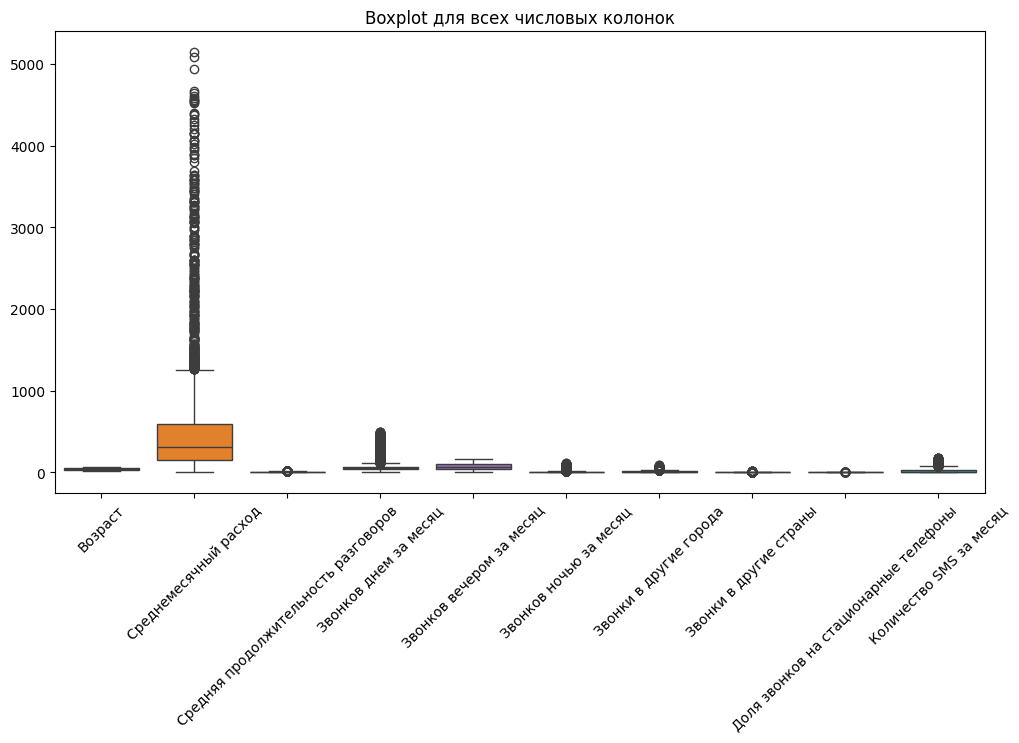

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=45)
plt.title("Boxplot для всех числовых колонок")
plt.show()

*Восстановить пропущенные значения*

In [27]:
df.isna().any()

,0
Возраст,False
Среднемесячный расход,True
Средняя продолжительность разговоров,True
Звонков днем за месяц,True
Звонков вечером за месяц,True
Звонков ночью за месяц,True
Звонки в другие города,True
Звонки в другие страны,False
Доля звонков на стационарные телефоны,True
Количество SMS за месяц,True


Колонки, где логично поставить 0 (нет звонков/SMS)

In [ ]:
cols_zero = [
    "Звонков днем за месяц",
    "Звонков вечером за месяц",
    "Звонков ночью за месяц",
    "Звонки в другие города",
    "Количество SMS за месяц"
]

df[cols_zero] = df[cols_zero].fillna(0)

Колонки, где пропуск — неизвестное значение, лучше медиана

In [33]:
cols_median = [
    "Доля звонков на стационарные телефоны",
    "Среднемесячный расход",
    "Средняя продолжительность разговоров"
]

for c in cols_median:
  df[c].fillna(df[c].median(),inplace=True)

Возраст                                  0
Среднемесячный расход                    0
Средняя продолжительность разговоров     0
Звонков днем за месяц                    0
Звонков вечером за месяц                 0
Звонков ночью за месяц                   0
Звонки в другие города                   0
Звонки в другие страны                   0
Доля звонков на стационарные телефоны    0
Количество SMS за месяц                  0
Дата подключения тарифа                  0
dtype: int64
Возраст                                  0
Среднемесячный расход                    0
Средняя продолжительность разговоров     0
Звонков днем за месяц                    0
Звонков вечером за месяц                 0
Звонков ночью за месяц                   0
Звонки в другие города                   0
Звонки в другие страны                   0
Доля звонков на стационарные телефоны    0
Количество SMS за месяц                  0
Дата подключения тарифа                  0
dtype: int64
Возраст                     

/tmp/ipython-input-217392627.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna(df[c].median(),inplace=True)


In [34]:
print(df.isna().sum())

Возраст                                  0
Среднемесячный расход                    0
Средняя продолжительность разговоров     0
Звонков днем за месяц                    0
Звонков вечером за месяц                 0
Звонков ночью за месяц                   0
Звонки в другие города                   0
Звонки в другие страны                   0
Доля звонков на стационарные телефоны    0
Количество SMS за месяц                  0
Дата подключения тарифа                  0
dtype: int64


**Шаг 3. Добавление новых переменных**


 По значениям признака "Дата подключения тарифа" создаю признаки: Год, Месяц, День;

In [ ]:
df['Год'] = df['Дата подключения тарифа'].dt.year
df['Месяц'] = df['Дата подключения тарифа'].dt.month

По значениям признака Возраст ввожу новую переменную "Возрастная категория", принимающую значения "студент", "аспирант", "бизнесмен" и "знаток" по следующую правилу: Возрастная категория = студент,если Возраст 19-24; аспирант,если Возраст 25-33; бизнесмен,если Возраст - 34,56; знаток,если Возраст 57-70

In [ ]:
def get_category(age):
    if age <= 24:
        return "Студент"
    elif 25 <= age <= 33:
        return "Аспирант"
    elif 34 <= age <= 56:
        return "Бизнесмен"
    else:
        return "Знаток"

df['Возрастная категория'] = df['Возраст'].apply(get_category)
df.head()

,Возраст,Среднемесячный расход,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Звонки в другие города,Звонки в другие страны,Доля звонков на стационарные телефоны,Количество SMS за месяц,Дата подключения тарифа,Год,Месяц,Возрастная категория
0,24,NaN,2.4,12.0,65.0,5.0,0.0,0,5.0,56.0,2018-06-17 12:14:35,2018,6,Студент
1,51,287.51,1.7,111.0,109.0,1.0,44.0,0,6.0,1.0,2021-10-21 15:39:54,2021,10,Бизнесмен
2,41,113.70,2.1,41.0,27.0,0.0,0.0,0,1.0,36.0,2015-03-26 11:26:15,2015,3,Бизнесмен
3,35,410.23,5.6,47.0,49.0,0.0,0.0,0,11.0,23.0,2016-01-04 15:53:20,2016,1,Бизнесмен
4,26,537.60,4.8,58.0,77.0,4.0,0.0,0,16.0,29.0,2017-05-03 13:33:53,2017,5,Аспирант


**Шаг 4. Провести исследовательский анализ данных:**

*Динамика подключения к тарифам (количество клиентов)*

In [ ]:
df["Дата подключения тарифа"] = df["Дата подключения тарифа"].dt.date


In [ ]:
count_date = df["Дата подключения тарифа"].value_counts()
count_date.head(10) # чаще всего встречаемая дата=больше всего клиентов в эти дни
count_date.tail(10)

,count
Дата подключения тарифа,
2021-04-12,1
2018-09-23,1
2018-10-27,1
2018-06-17,1
2021-07-30,1
2018-03-30,1
2019-11-06,1
2017-07-23,1
2017-07-17,1


In [ ]:
#Добавляю новый столбец count
df["count"] = df["Дата подключения тарифа"].map(count_date)



In [ ]:
df["Дата подключения тарифа"] = pd.to_datetime(df["Дата подключения тарифа"],errors = "coerce")

**Шаг 3. Провести исследовательский анализ данных**

в разрезе значений признаков Год подключения, Месяц подключения, Дата подключения исследуйте:

динамику подключения к тарифам (количество клиентов). Постройте графики. В какой год, месяц и день подключались меньше/больше всего клиентов? Какие выводы можно сделать?

клиенты каких возрастных категорий (ТОП-2):

больше всего в среднем в месяц тратят на оплату услуг связи;
больше всего тратят времени на общение в месяц днем, вечером и ночью;
больше всего по количеству звонков в месяц днем, вечером и ночью. Совпадают ли результаты с предыдущем пунктом;
с помощью диаграмм рассеивания исследуейте зависимости между признаками Среднемесячный расход, Средняя продолжительность разговоров, Звонков днем за месяц, Звонков вечером за месяц, Звонков ночью за месяц, Звонки в другие города, Доля звонков на стационарные телефоны, Количество SMS за месяц. Какие выводы можно сделать?

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
count_date = df["Дата подключения тарифа"].value_counts()
count_date.head(10) # чаще всего встречаемая дата=больше всего клиентов в эти дни


,count
Дата подключения тарифа,
2017-12-06,7
2015-11-05,7
2015-02-09,7
2020-02-21,7
2015-02-08,7
2021-08-13,7
2021-07-19,7
2021-06-11,7
2017-06-28,6


In [ ]:
count_date.tail(10)

,count
Дата подключения тарифа,
2021-04-12,1
2018-09-23,1
2018-10-27,1
2018-06-17,1
2021-07-30,1
2018-03-30,1
2019-11-06,1
2017-07-23,1
2017-07-17,1


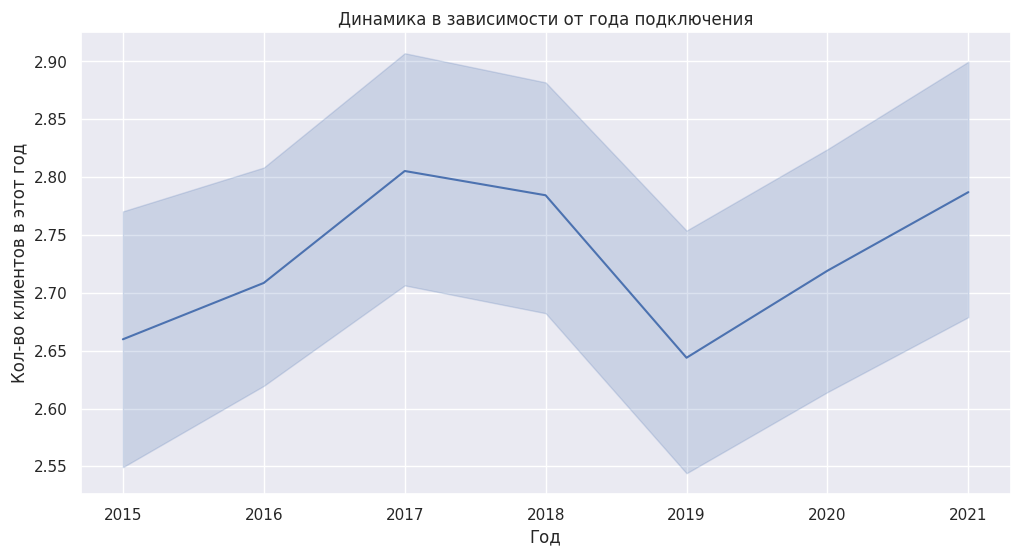

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="Год", y="count", data=df)

plt.title("Динамика в зависимости от года подключения")
plt.xlabel("Год")
plt.ylabel("Кол-во клиентов в этот год")

# Display the plot
plt.show()

In [ ]:
count_date = df["Год"].value_counts()
count_date.head(10) # чаще всего встречаемая дата=больше всего клиентов в эти дни
#count_date.tail(10)

,count
Год,
2017,678
2018,677
2016,652
2020,648
2021,648
2019,601
2015,588


In [ ]:
count_date = df["Месяц"].value_counts()
count_date.head(12)


,count
Месяц,
8,423
5,408
6,390
9,389
4,386
10,370
2,368
1,360
11,359


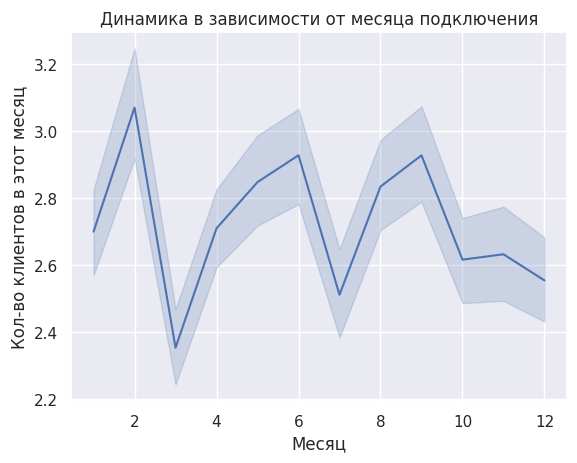

In [ ]:
sns.lineplot(x="Месяц", y="count", data=df)

plt.title("Динамика в зависимости от месяца подключения")
plt.xlabel("Месяц")
plt.ylabel("Кол-во клиентов в этот месяц")

# Display the plot
plt.show()

Судя по проделанной работе, самые часто встречающиеся показатели = дни с наибольшем числом клиентов в этот день.
В 2017 в августе было больше всего клиентов, меньше всего в марте, количество клиентов примерно одинакова (разница между максимумом и минимумом - 86 человек)